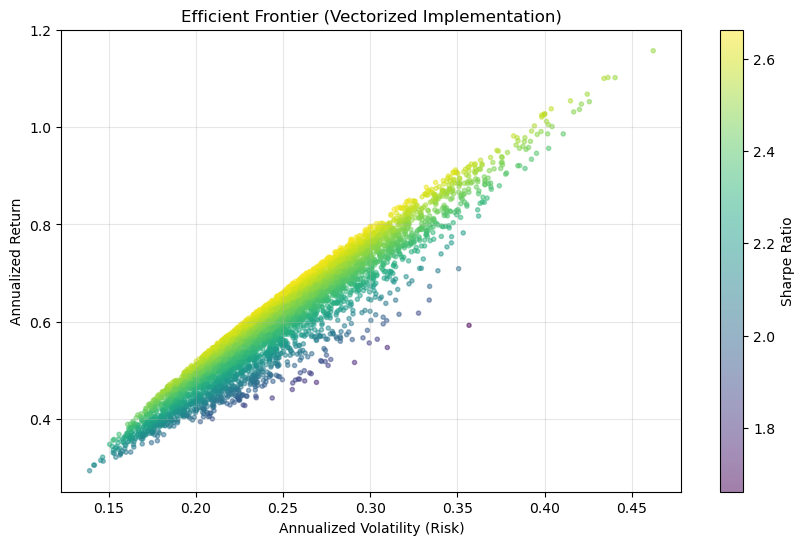

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 1. 數據準備 (這部分比較瑣碎，我先給你)
tickers = ['TSM', 'SPY', 'NVDA', 'AAPL']
data = yf.download(tickers, start='2023-01-01', end='2025-01-01', progress=False)['Close']
returns = data.pct_change().dropna()

# --- 你的數學轉換 ---

# TODO 1: 計算四檔資產的「平均日報酬」向量 (mean_returns)
# 提示: 使用 pandas 的 mean()
# mean_returns = ...
mean_returns = returns.mean()

# TODO 2: 計算四檔資產的「共變異數矩陣」 (cov_matrix)
# 提示: 使用 pandas 的 cov()
# cov_matrix = ...
cov_matrix = returns.cov()

num_portfolios = 5000
num_assets = len(tickers)

# --- 權重生成 ---

# TODO 3: 生成隨機矩陣 (5000, 4)
# 提示: np.random.random(...)
# raw_weights = ...
raw_weights = np.random.random((num_portfolios, num_assets))

# TODO 4: 歸一化 (Normalization) - 關鍵！
# 每一列都要除以「該列的總和」，確保權重和為 1
# 提示: sum(axis=1) 會得到 (5000,)，你需要把它 reshape 成 (5000, 1) 才能除
# weights = ...
weights = raw_weights / raw_weights.sum(axis=1).reshape(5000, 1)

# --- 報酬計算 ---

# TODO 5: 計算 5000 個組合的預期報酬 (port_returns)
# 數學: R_p = W * mu
# 維度: (5000, 4) @ (4,) -> (5000,)
# port_returns = ...
port_returns = weights @ mean_returns.values

# --- 風險計算 (大魔王關卡) ---

# 我們要算 sigma^2 = w * Sigma * w.T
# 但不能直接做矩陣乘法，否則會跑出 (5000, 5000) 的巨型垃圾矩陣
# 我們分兩步走：

# TODO 6: 第一步，計算 W * Sigma
# 維度: (5000, 4) @ (4, 4) -> (5000, 4)
# temp_matrix = ...
temp_matrix = weights @ cov_matrix.values

# TODO 7: 第二步，取出對角線元素 (Row-wise Dot Product)
# 數學: sum( temp_matrix * weights ) by row
# 提示: 兩個 (5000, 4) 的矩陣直接相乘 (*) 是元素對應相乘
# 然後沿著 axis=1 加總
# port_variance = ...
port_variance = np.sum(temp_matrix * weights, axis=1)

# --- 年化 ---
# 假設一年 252 天
# Return * 252
# Volatility = sqrt(Variance) * sqrt(252)

# TODO 8: 算出年化報酬與年化標準差
# ann_returns = ...
# ann_volatility = ...
ann_returns = port_returns * 252
ann_volatility = np.sqrt(port_variance) * np.sqrt(252)

plt.figure(figsize=(10, 6))

# TODO 9: 繪製散佈圖
# 我們必須把 scatter 的結果存成一個變數 (sc)，這樣 colorbar 才知道要讀取誰的顏色
sharpe_ratios = ann_returns / ann_volatility

sc = plt.scatter(x=ann_volatility, 
                 y=ann_returns, 
                 c=sharpe_ratios, # 顏色依據 Sharpe Ratio
                 cmap='viridis',  # 選擇色票
                 marker='.',      # 點的形狀
                 alpha=0.5)       # 透明度

plt.colorbar(sc, label='Sharpe Ratio') # 明確告訴 colorbar 要參考 sc
plt.title('Efficient Frontier (Vectorized Implementation)')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.grid(True, alpha=0.3) # 加個網格會更好看
plt.show()